In [24]:
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import pandas as pd
import numpy as np

Lab 2.1.3

In [5]:
wins = pd.read_csv('../data/02_mlb-team-seasons.csv')
wins.head()

,yearID,teamID,RS,RA,W,G,WP,WP_Pythag_2
0,2017,ARI,812,659,93,162,0.574074,0.602898
1,2017,ATL,732,821,72,162,0.444444,0.442879
2,2017,BAL,743,841,75,162,0.462963,0.438367
3,2017,BOS,785,668,93,162,0.574074,0.580004
4,2017,CHA,706,820,67,162,0.413580,0.425709


In [17]:
#task 1
wins['columnA'] = np.log(wins['WP'])-np.log(1-wins['WP'])
wins['columnB'] = np.log(wins['RS']) - np.log(wins['RA'])
reg = linear_model.LinearRegression()
reg.fit(wins[['columnB']], wins['columnA'])
alpha = reg.coef_
print(alpha)

[1.80002596]


1.0


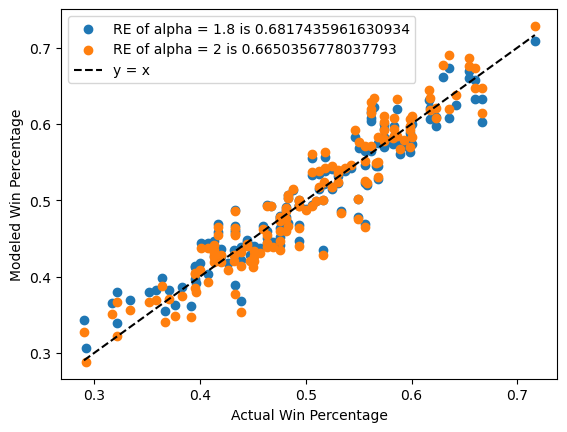

In [52]:
#task 2 
wins['WP_newPythag'] = (wins['RS'])**alpha/(wins['RS']**alpha+wins['RA']**alpha)
wins.head()
import math
def RE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    residuals = np.array(y_true-y_predicted)
    residuals_sd = np.std(residuals)
    response_sd = np.std(y_true)
    #RSS = np.sum(np.square(y_true - y_predicted))
    re = 1 - residuals_sd/response_sd
    #rse = math.sqrt(RSS / (len(y_true) - 2))
    return re


if __name__ == "__main__":
    y_true = [1, 2, 3]
    y_predicted = [2, 3, 4]
    print(RE(y_true, y_predicted))
  
RE_pythag = RE(wins['WP'], wins['WP_Pythag_2'])  
RE_alpha = RE(wins['WP'], wins['WP_newPythag'])   
plt.scatter(wins['WP'], wins['WP_newPythag'], label=f'RE of alpha = 1.8 is {RE_alpha}')
plt.scatter(wins['WP'], wins['WP_Pythag_2'], label=f'RE of alpha = 2 is {RE_pythag}')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Modeled Win Percentage')
min_val = min(wins['WP'].min(), wins['WP_newPythag'].min())
max_val = max(wins['WP'].max(), wins['WP_newPythag'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')

plt.legend()
    


Lab 2.2.2

In [70]:
old_payroll = pd.read_csv('../data/02_mlb-payrolls.csv')
old_payroll.head()

,teamID,yearID,G,W,L,Win_per,WP,wins_162,attendance,name,OpeningDay_26_man,YearEnd_40_man,source,quart_salary,quart_salary_YrEnd,wins90,Payroll/Median,Log (Payroll/Median)
0,ARI,1998,162,65,97,40.1,0.401235,65.0,3610290.0,Arizona Diamondbacks,29161500,NaN,BBCube,1,NaN,not_highwins_90,0.642777,-0.441958
1,ARI,1999,162,100,62,61.7,0.617284,100.0,3019654.0,Arizona Diamondbacks,70370999,NaN,BBCube,3,NaN,highwins_91,1.521594,0.419759
2,ARI,2000,162,85,77,52.5,0.524691,85.0,2942251.0,Arizona Diamondbacks,77900000,77245341.0,COTS,3,4.0,not_highwins_90,1.262561,0.233142
3,ARI,2001,162,92,70,56.8,0.567901,92.0,2736451.0,Arizona Diamondbacks,85508000,85126449.0,COTS,3,3.0,highwins_91,1.302906,0.264597
4,ARI,2002,162,98,64,60.5,0.604938,98.0,3198977.0,Arizona Diamondbacks,102819999,103528877.0,COTS,4,4.0,highwins_91,1.620529,0.482753


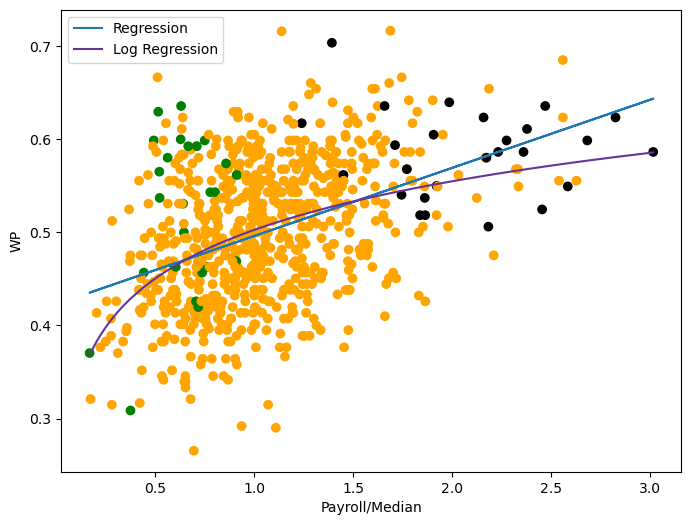

In [118]:
#task 1 

#remove 2020
payroll = old_payroll.drop(columns=old_payroll.columns[(old_payroll == 2020).any()])

#plot win percentage against payroll/median
#mark yankees and oakland a's 
colors = ['k' if name == 'New York Yankees' else 'g' if name == 'Oakland Athletics' else 'orange' for name in payroll['name']]
plt.figure(figsize=(8, 6))
plt.scatter(payroll['Payroll/Median'],payroll['WP'], c = colors)
plt.ylabel('WP')
plt.xlabel('Payroll/Median')

#add regression line for regular regression
reg = linear_model.LinearRegression()
reg.fit(payroll[['Payroll/Median']], payroll[['WP']])
predicted = reg.predict(payroll[['Payroll/Median']])
plt.plot(payroll[['Payroll/Median']], predicted, label = 'Regression') 

#add regression line for log regression
reg2 = linear_model.LinearRegression()
# log_X = np.log(payroll[['Payroll/Median']])
reg2.fit(payroll[['Log (Payroll/Median)']], payroll[['WP']])
log_predicted = reg2.predict(payroll[['Log (Payroll/Median)']])
# plt.plot(payroll['Payroll/Median'], log_predicted, label='Log Regression', color='rebeccapurple')
sorted_idx = payroll['Payroll/Median'].argsort()
x_sorted = payroll['Payroll/Median'].values[sorted_idx]
y_sorted = log_predicted[sorted_idx]

plt.plot(x_sorted, y_sorted, label='Log Regression', color='rebeccapurple')
plt.legend()

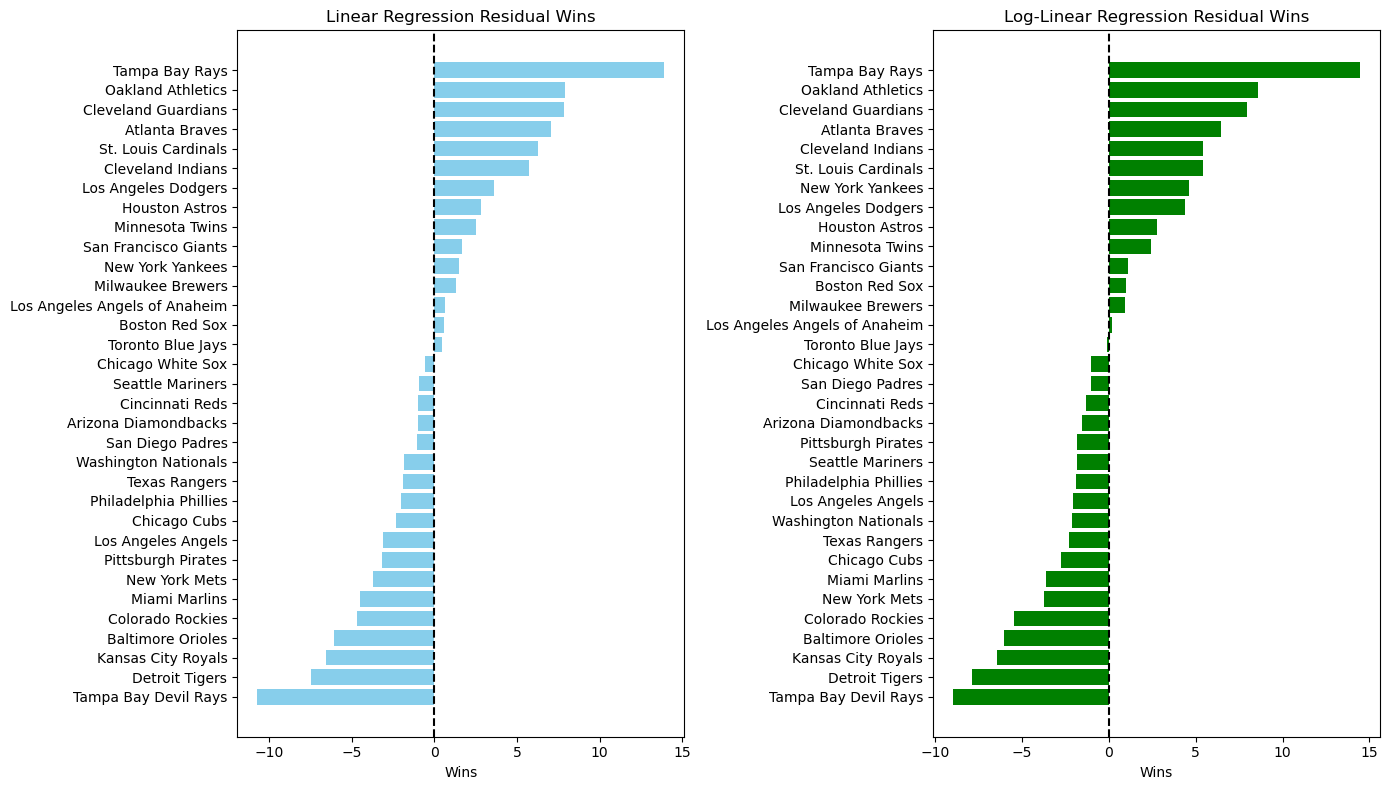

In [121]:
#task 2 

payroll['Predicted'] = predicted
payroll['Log_Predicted'] = log_predicted

#calculate 
payroll['diffPredicted'] = payroll['WP']-payroll['Predicted']
payroll['diffLog_Predicted'] = payroll['WP']-payroll['Log_Predicted']

#
avg_diff = 162*payroll.groupby('name')['diffPredicted'].mean().sort_values(ascending = True)
avg_log_diff = 162*payroll.groupby('name')['diffLog_Predicted'].mean().sort_values(ascending = True)

fig, axes = plt.subplots(ncols=2, figsize=(14, 8), sharey=False)

# --- Plot 1: Linear Regression Residuals ---
axes[0].barh(avg_diff.index, avg_diff.values, color='skyblue')
axes[0].axvline(0, color='black', linestyle='--')
axes[0].set_title('Linear Regression Residual Wins')
axes[0].set_xlabel('Wins')

# --- Plot 2: Log-Linear Regression Residuals ---
axes[1].barh(avg_log_diff.index, avg_log_diff.values, color='green')
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title('Log-Linear Regression Residual Wins')
axes[1].set_xlabel('Wins')

# Overall layout
plt.tight_layout()
plt.show()